
<img src="http://hydrology.usu.edu/images/taudem5logo.gif" style="float:left;width:300px;padding:20px">       


# TauDEM Raster Processing Notebook

<br>
This notebook performs basic digital elevation model (DEM) processing and prepares topographic inputs (flow direction, contributing area, unit-contributing area) for the shallow landslide modeling component of Landlab using the TauDEM GIS library. 

The DEM must be a raster data set saved in Tiff format. Large files may not run. 
For more information about TauDEM, see http://hydrology.usu.edu/taudem/taudem5/.  This notebook is divided into the following three categories:

* [Setup and Preparation](#setup)
* [DEM Processing using TauDEM](#gis)
* [Create Resource and Save Results Back Onto Hydroshare](#creation)


###  Script Setup and Preparation
<a name="setup"></a>

Before we begin DEM processing, we must import several libaries into this notebook.  The **hs_utils** library provides functions for interacting with HydroShare, including resource querying, dowloading and creation.  The **taudem** libary provides functions for simplifying the TauDEM GIS commands, workspace maintenance, as well as visualization. Finally, the `%matplotlib inline` command tells the notebook server to place plots and figures directly into the notebook. 

**Note:** You may see some matplotlib warnings if this is the first time you are running this notebook.  These warnings can be ignored.


In [7]:
# import required libaries for geoprocessing
import os
from utilities import hydroshare, taudem
%matplotlib inline

Next we need to establish a secure connection with HydroShare.  This is done by simply initiating the `hydroshare` class that is defined within `hs_utils`.  In addition to connecting with HydroShare, this command also sets environment variables for several parameters that may useful to you: 

1. Your Hydroshare username
2. The ID of the resource which launched the notebook
3. The type of resource that launched this notebook
4. The url for the notebook server.

In [8]:
# establish a secure connection to HydroShare
hs = hydroshare.hydroshare()

Adding the following system variables:
   HS_USR_NAME = keckje
   HS_RES_ID = 0e49df4b97f94247a8d52bac4adeb14a
   HS_RES_TYPE = genericresource
   JUPYTER_HUB_IP = jupyter.cuahsi.org

These can be accessed using the following command: 
   os.environ[key]

   (e.g.)
   os.environ["HS_USR_NAME"]  => keckje
Successfully established a connection with HydroShare


### Retrieve a raster resource using its ID

Once a connection with hydroshare has been established and all needed libraries have been imported, the DEM can be loaded into the notebook. This is done using the `getResourceFromHydroShare` function.

To use the function, copy and past the global identifier from the url of the resource where the DEM is saved into the box below.

For example, if the url of the resource is:
https://www.hydroshare.org/resource/c0a282a6108e41e3a8c25c157337c0af/
Copy c0a282a6108e41e3a8c25c157337c0af

Run the cell. If you get the prompt: 'This resource already exists in your userspace. Would you like to overwrite this data [Y/n]?', enter 'Y' if this is your first time to upload the DEM.

In [42]:
# get some resource content. The resource content is returned as a dictionary
GlobalID = '738b825d1dd54d8aaae373d165082f45'#Enter global id between single quotation marks
content = hs.getResourceFromHydroShare(GlobalID)

This resource already exists in your userspace.
Would you like to overwrite this data [Y/n]? n


The DEM is downloaded to the Python notebook server and can now be processed with TauDEM.


### Prepare a directory for output files

The `taudem` library consists of utility functions for DEM processing.  The `create_workspace` function is used to build a clean directory for our DEM processing results. 

Enter a name into the `create_workspace` function and run the function.

In [43]:
# prepare a clean workspace for TauDEM output files
data_directory = taudem.create_workspace('YourDirectoryName')#enter name between single quotation marks

This directory already exists.
Would you like to remove it [Y/n]? y
A clean directory has been created


---


##  DEM Processing
<a name="gis"></a>

The following operations demonstrate how TauDEM can be used to perform basic raster processes. See the following link for more information on TauDEM:  
http://hydrology.usu.edu/taudem/taudem5/TauDEM53CommandLineGuide.pdf

### 1. View the Raw DEM

First enter the name of the DEM file

In [28]:
DEM = 'dem30mwgs84v6.tif' #enter name of file between single quatation marks

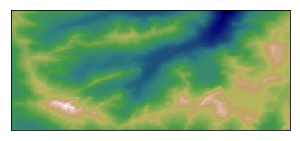

In [29]:
# display the raw dem

raw_dem_path = hs.content[DEM]
taudem.plot_tiff(raw_dem_path)

### 2. Remove DEM Pits



In [32]:
# Fill the DEM Pits

# set the output paths
fill = os.path.join(data_directory, 'fill.tif')
cmd = 'pitremove -z %s -fel %s' % (raw_dem_path, fill)
taudem.run_cmd(cmd, processors=4)

PitRemove version 5.3.7
Input file ../data/738b825d1dd54d8aaae373d165082f45/738b825d1dd54d8aaae373d165082f45/data/contents/dem30mwgs84v6.tif has geographic coordinate system.
Processes: 4
Header read time: 0.002090
Data read time: 0.000105
Compute time: 0.005897
Write time: 0.004769
Total time: 0.012861




### 3. Calculate Flow Directions

In [33]:
#####################
# D8 Flow Direction #
#####################

# set the output paths 
fdr = os.path.join(data_directory, 'fdr.tif')  # flowdir
sd8 = os.path.join(data_directory, 'sd8.tif')  # slope

cmd = 'd8flowdir -fel %s -sd8 %s -p %s' % (fill, sd8, fdr)
taudem.run_cmd(cmd, processors=4)

D8FlowDir version 5.3.7
Input file /home/jovyan/work/notebooks/data/YourDirectoryName/fill.tif has geographic coordinate system.
Processors: 4
Header read time: 0.001973
Data read time: 0.000577
Compute Slope time: 0.003565
Write Slope time: 0.010356
Resolve Flat time: 0.013024
Write Flat time: 0.002760
Total time: 0.032256




In [34]:
#######################
# DInf Flow direction #
#######################

# set the output paths 
ang = os.path.join(data_directory, 'ang.tif')  # flow angle
slp = os.path.join(data_directory, 'slp.tif')  # flow slope

cmd = 'dinfflowdir -fel %s -ang %s -slp %s' % (fill, ang, slp)
taudem.run_cmd(cmd, processors=4)

DinfFlowDir version 5.3.7
Input file /home/jovyan/work/notebooks/data/YourDirectoryName/fill.tif has geographic coordinate system.
Processors: 4
Header read time: 0.001982
Data read time: 0.001084
Compute Slope time: 0.014245
Write Slope time: 0.004913
Resolve Flat time: 0.012878
Write Flat time: 0.004492
Total time: 0.039593




#### Plot the Results

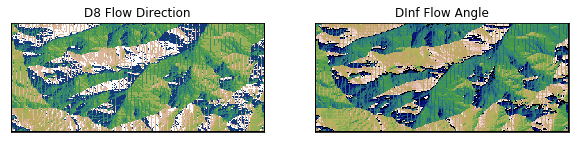

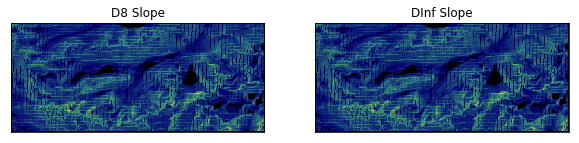

In [37]:
taudem.plot_tiff(tiff=[fdr, ang], title=['D8 Flow Direction', 'DInf Flow Angle'])
taudem.plot_tiff(tiff=[sd8, slp], title=['D8 Slope', 'DInf Slope'])

### 4. Calculate Contributing Area

In [38]:
########################
# D8 Contributing Area #
########################

# set the output paths
ad8 = os.path.join(data_directory, 'ad8.tif')  # D8 contributing area

# build the taudem command
cmd = 'aread8 -p %s -ad8 %s' % (fdr, ad8)
# -p:   D8 flow direction output file   
# -ad8: D8 contributing area file (output)  

# run the command
taudem.run_cmd(cmd, processors=4)

AreaD8 version 5.3.7
Input file /home/jovyan/work/notebooks/data/YourDirectoryName/fdr.tif has geographic coordinate system.
Number of Processes: 4
Read time: 0.002024
Compute time: 0.004588
Write time: 0.002577
Total time: 0.009189




In [39]:
##########################
# DInf Contributing Area #
##########################

# set the output paths
sca = os.path.join(data_directory, 'sca.tif')  # D-Infinity contributing area

# build the taudem command
cmd = 'areadinf -ang %s -sca %s' % (ang, sca)                         
# -ang: D-infinity flow direction input file.                                  
# -sca: D-infinity area output file.                                             

# run the command
taudem.run_cmd(cmd, processors=4)

AreaDinf version 5.3.7
Input file /home/jovyan/work/notebooks/data/YourDirectoryName/ang.tif has geographic coordinate system.
Processors: 4
Read time: 0.002521
Compute time: 0.028477
Write time: 0.005194
Total time: 0.036192




---
## Create Resource and Save Results Back into HydroShare
<a name="creation"></a>

Using the `hs_utils` library, the results of the Geoprocessing steps above can be saved back into HydroShare.  First, define all of the required metadata for resource creation, i.e. *title*, *abstract*, *keywords*, *content files*.  In addition, we must define the type of resource that will be created, in this case *genericresource*.  

***Note:*** Make sure you save the notebook at this point, so that all notebook changes will be saved into the new HydroShare resource.


***Optional*** : define the resource from which this "new" content has been derived.  This is one method for tracking resource provenance.

In [44]:
# define HydroShare required metadata
title = 'TauDEM Processing of _____ Watershed' #enter watershed name
abstract = 'This a group of TauDEM processing results that were derived using the ___ DEM.' #name of DEM
keywords = ['TauDEM', '________', 'Geoprocessing']#enter key words



Run the next cell to create resource and save TauDEM ouput

In [45]:
# set the resource type that will be created.
rtype = 'genericresource'

# create a list of files that will be added to the HydroShare resource.
files = [hs.content[DEM], # input DEM for watershed
         'taudem.ipynb',          # this notebook
         fill, # pit fill dem
         fdr,  # D8 flow direction
         sd8,  # D8 slope
         ang,  # DInf flow angle
         slp,  # DInf slope
         ad8,  # D8 contributing area
         sca   # DInf contributing area
        ]  

# Set the DEM resource as the "parent" 
# (i.e. the new resource will be "derived from" the GlobalID of the input DEM resource)
parent_resource = GlobalID

In [47]:
# create a hydroshare resource containing these data
resource_id = hs.createHydroShareResource(abstract, 
                                          title, 
                                          derivedFromId=parent_resource,
                                          keywords=keywords, 
                                          resource_type=rtype, 
                                          content_files=files, 
                                          public=False)

Resource Created Successfully                           
Successfully Added Content Files                      


Exception in thread Thread-11:
Traceback (most recent call last):
  File "/opt/conda/envs/python2/lib/python2.7/threading.py", line 801, in __bootstrap_inner
    self.run()
  File "/opt/conda/envs/python2/lib/python2.7/threading.py", line 754, in run
    self.__target(*self.__args, **self.__kwargs)
  File "/home/jovyan/work/notebooks/utilities/hydroshare/threads.py", line 23, in f
    res = self.func(*args, **kwargs)
  File "/home/jovyan/work/notebooks/utilities/hydroshare/hydroshare.py", line 66, in _addContentToExistingResource
    self.hs.addResourceFile(resid, f)
  File "build/bdist.linux-x86_64/egg/hs_restclient/__init__.py", line 999, in addResourceFile
    close_fd = self._prepareFileForUpload(params, resource_file, resource_filename)
  File "build/bdist.linux-x86_64/egg/hs_restclient/__init__.py", line 229, in _prepareFileForUpload
    raise HydroShareArgumentException("{0} is not a file or is not readable.".format(resource_file))
HydroShareArgumentException: /home/jovyan/work/